In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np
import pandas as pd

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

%matplotlib notebook

plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
data = pd.read_csv("../datasets/pokemon/pokemon_alopez247.csv")
print data.head(2).T

                          0          1
Number                    1          2
Name              Bulbasaur    Ivysaur
Type_1                Grass      Grass
Type_2               Poison     Poison
Total                   318        405
HP                       45         60
Attack                   49         62
Defense                  49         63
Sp_Atk                   65         80
Sp_Def                   65         80
Speed                    45         60
Generation                1          1
isLegendary           False      False
Color                 Green      Green
hasGender              True       True
Pr_Male               0.875      0.875
Egg_Group_1         Monster    Monster
Egg_Group_2           Grass      Grass
hasMegaEvolution      False      False
Height_m               0.71       0.99
Weight_kg               6.9         13
Catch_Rate               45         45
Body_Style        quadruped  quadruped


In [3]:
#data_use = data.ix[:,['Sp_Atk','Sp_Def','Attack','Defense',"hasGender"]]
data_use = data.ix[:,['Sp_Atk','Attack',"hasGender"]]
labels   = data.ix[:,['isLegendary']]
names = data.ix[:,['Name']]

<IPython.core.display.Javascript object>


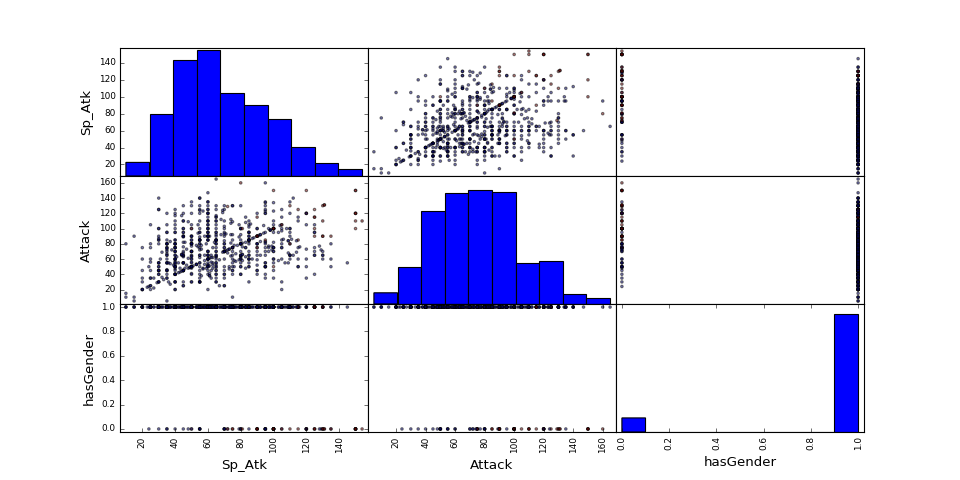

In [4]:

pd.scatter_matrix(data_use,c=labels)
plt.show()

<IPython.core.display.Javascript object>


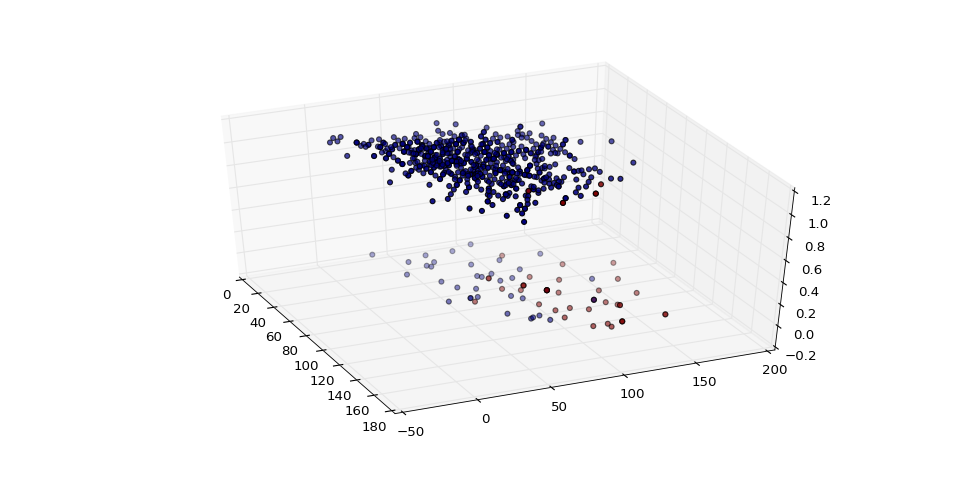

In [5]:

X = data_use.values
y = labels.values


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

ax1.scatter(X[:,0],X[:,1],X[:,2],c=y)
plt.show()

In [6]:

from sklearn.model_selection import train_test_split

X = data_use.values
y = labels.values.ravel()
train_data, test_data,train_target,  test_target = train_test_split(X,y, test_size=0.50, random_state=42)

In [7]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=10)
clf.fit(train_data,train_target)

predictions = clf.predict(test_data)
print "Accuracy score: %f" %(predictions==test_target).mean()

print confusion_matrix(test_target,predictions)

print clf.feature_importances_
indices = np.argsort(clf.feature_importances_)[::-1]

for f in range(len(indices)):
    print('%d. egenskap: %d - %s (%f)' % (f+1 , 
                                      indices[f], 
                                      data_use.columns[indices[f]], 
                                      clf.feature_importances_[indices[f]]))

Accuracy score: 0.969529
[[333   5]
 [  6  17]]
[ 0.02535627  0.40499636  0.56964736]
1. egenskap: 2 - hasGender (0.569647)
2. egenskap: 1 - Attack (0.404996)
3. egenskap: 0 - Sp_Atk (0.025356)


## Hvilke pokemon blir feilklassifisert?

In [8]:
predictions = clf.predict(data_use)
idxs = np.arange(len(predictions))

true_labels = labels.values.ravel()
feil_klasse_idx = idxs[predictions!=true_labels]

feil_klasse_0_idx = feil_klasse_idx[true_labels[feil_klasse_idx]==0]
feil_klasse_1_idx = feil_klasse_idx[true_labels[feil_klasse_idx]==1]



print "Ikke legendariske pokemon klassifisert som legendariske"  

for i,fi in enumerate(feil_klasse_0_idx):
    print data.ix[fi]['Name'],"( nummer:", data.ix[fi]['Number'], "generasjon:",data.ix[fi]['Generation'],")"
    
print "---"
print "Legendariske pokemon klassifisert som ikke legendariske"       
for i,fi in enumerate(feil_klasse_1_idx):
    print data.ix[fi]['Name'],"( nummer:", data.ix[fi]['Number'], "generasjon:",data.ix[fi]['Generation'],")"


Ikke legendariske pokemon klassifisert som legendariske
Mew ( nummer: 151 generasjon: 1 )
Celebi ( nummer: 251 generasjon: 2 )
Shedinja ( nummer: 292 generasjon: 3 )
Solrock ( nummer: 338 generasjon: 3 )
Metagross ( nummer: 376 generasjon: 3 )
Bronzong ( nummer: 437 generasjon: 4 )
Manaphy ( nummer: 490 generasjon: 4 )
Klinklang ( nummer: 601 generasjon: 5 )
Golurk ( nummer: 623 generasjon: 5 )
Genesect ( nummer: 649 generasjon: 5 )
---
Legendariske pokemon klassifisert som ikke legendariske
Suicune ( nummer: 245 generasjon: 2 )
Regice ( nummer: 378 generasjon: 3 )
Registeel ( nummer: 379 generasjon: 3 )
Latias ( nummer: 380 generasjon: 3 )
Latios ( nummer: 381 generasjon: 3 )
Uxie ( nummer: 480 generasjon: 4 )
Heatran ( nummer: 485 generasjon: 4 )
Tornadus ( nummer: 641 generasjon: 5 )
Thundurus ( nummer: 642 generasjon: 5 )
Landorus ( nummer: 645 generasjon: 5 )


## Andre klassifiseringsalgritmer

In [9]:
clf = SVC()
clf.fit(train_data,train_target)

predictions = clf.predict(test_data)
print "Accuracy score: %f" %(predictions==test_target).mean()

confusion_matrix(test_target,predictions)

Accuracy score: 0.944598


array([[336,   2],
       [ 18,   5]])

In [10]:
clf = KNeighborsClassifier()
clf.fit(train_data,train_target)

predictions = clf.predict(test_data)
print "Accuracy score: %f" %(predictions==test_target).mean()

confusion_matrix(test_target,predictions)

Accuracy score: 0.958449


array([[335,   3],
       [ 12,  11]])